<a href="https://colab.research.google.com/github/TuguduMiamMiam/Projet-piscine/blob/main/starters/ts-project-starter/ts-project/notebooks/mlp_rossmann.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression Starter — Colab

> Author: Gouesse Sixtine & Gentieu Martin

Ce notebook est un projet de bout en bout pour de la **régression tabulaire** sur le dataset **Rossmann Store Sales** avec un **MLP PyTorch**.

# M1 — Problem Scoping & Data Validation

### Problem Statement
L’objectif de ce projet est d’entraîner un modèle **MLP (Multi-Layer Perceptron)** pour **prédire le montant des ventes journalières Sales** sur le dataset **Rossmann Store Sales** .

- **Entrée du modèle :** vecteur de features décrivant un magasin Rossmann et le contexte (date, promo, metadata magasin…).

- **Sortie :** une valeur réelle `Sales` (ventes du jour pour un magasin donné).

## Model Inputs

Les features d’entrée (colonnes) proviennent de la jointure `train.csv` + `store.csv`,  puis de la sélection de toutes les colonnes **numériques** (hors `Sales`).

Les features d’entrée (colonnes) :
- **Identifiant & activité du magasin**
  - `Store` : identifiant du magasin  
  - `Customers` : nombre de clients ce jour-là  
  - `Open` : indicateur magasin ouvert (filtré à 1 dans la préparation, mais peut rester dans les features)  
  - `SchoolHoliday` : jour férié scolaire (binaire)  

- **Contexte temporel & effets calendaires**
  - `year` : année  
  - `month` : mois  
  - `day` : jour du mois  
  - `dow` : jour de la semaine (0–6)  
  - `DayOfWeek` : code du jour de la semaine issu du CSV brut (numérique)

- **Promotions**
  - `Promo` : promotion active ce jour-là (binaire)  
  - `Promo2` : promotion continue (binaire)  
  - `Promo2SinceYear`, `Promo2SinceWeek` : année / semaine de début de Promo2 (NAs imputés par la médiane)

- **Concurrence**
  - `CompetitionDistance` : distance au concurrent le plus proche  
  - `CompetitionOpenSinceYear`, `CompetitionOpenSinceMonth` : année / mois d’ouverture de la concurrence (NAs imputés par la médiane pour l’année)

- **Encodage de catégorielles en codes numériques**
  - `StateHoliday` : type de jour férié (encodé en `category` → codes entiers)  
  - `StoreType` : type de magasin (A, B, C, D → codes entiers)  
  - `Assortment` : type d’assortiment (encodé en codes entiers)

La cible (variable à prédire) est : `Sales` : montant des ventes journalières du magasin (valeur réelle continue, > 0 après filtrage dans la préparation)


## Model Outputs

- Une **valeur réelle** : prédiction du montant des ventes journalières `Sales` pour le couple *(magasin, date)* donné.

### Evaluation Metrics
- **MSE**
- **MAE**
- **R²**
- **plot of predictions vs ground truth**

## Data Card – California Housing Dataset

**Nom du dataset :** Rossmann Store Sales

**Source :**  Dataset Kaggle *"Rossmann Store Sales"* (compétition officielle)

**Tâche :** Régression (prédire une valeur continue : les ventes journalières `Sales`)

**Format brut :**

Le dataset Kaggle original contient plusieurs fichiers CSV :

- **`train.csv`** — historiques de ventes journalières par magasin :  
  - chaque ligne représente : un magasin **Store** à une **Date** donnée  
  - les colonnes décrivent : `Sales`, `Customers`, `Open`, `Promo`, `StateHoliday`, `SchoolHoliday`, etc.

- **`store.csv`** — métadonnées magasin :  
  - type de magasin, assortiment, distance concurrence, dates d’ouverture de concurrents, promo2…

- **`test.csv`** — mêmes colonnes que `train.csv` hors `Sales` (pour la compétition Kaggle)

- **`sample_submission.csv`** — format attendu pour les prédictions Kaggle

**Pré-processing appliqué dans ce notebook :**

Le notebook utilise le script `rossmann_prep.py` pour produire un dataset propre et entièrement numérique.  
Voici les principales étapes du pipeline :  

1. **Jointure `train.csv` + `store.csv`** sur la colonne `Store`.  
2. **Filtrage des lignes** :  
   - `Open == 1` (on ignore les jours où le magasin est fermé)  
   - `Sales > 0` (consistent avec les choix de nettoyage du script)  
3. **Feature engineering calendaire :**  
   - extraction de `year`, `month`, `day`, `dow` depuis la colonne `Date`  
4. **Imputation simple des valeurs manquantes**  
   - médiane pour `Promo2SinceYear`, `CompetitionOpenSinceYear`  
5. **Encodage numérique des catégorielles** (`StateHoliday`, `StoreType`, `Assortment`) → codes d'entiers  
6. **Sélection finale des features** :  
   - toutes les colonnes numériques sauf `Sales` sont des features  
   - `Sales` devient la cible  
7. **Splits du dataset :**  
   - **70% train**, **15% validation**, **15% test**  
8. **Standardisation (z-score)** :  
   - séparation `fit` sur train, `transform` sur val/test  
   - standardisation appliquée aux *features* et à la *target*  
9. **Construction des DataLoaders PyTorch** :  
   - `TensorDataset` + `DataLoader` avec batch size défini dans le YAML

**Impact & risques :**

- **Effets saisonniers et structurels** :  
  Les ventes varient fortement selon les promotions, les jours de la semaine, les vacances, et les saisons ; cela introduit un risque de **sur-interprétation** si le modèle n'est pas correctement régularisé.

- **Biais calendaires** :  
  Certains jours particuliers (ex : jours fériés spécifiques à certaines régions) peuvent biaiser les prédictions.

- **Dépendance géographique** :  
  Le dataset ne couvre qu’un pays spécifique (Allemagne pour Rossmann). Le modèle n'est **pas généralisable** à d’autres marchés sans recalibrage.

- **Data leakage potentiel** :  
  Si des features directement corrélées à `Sales` (comme `Customers`) étaient utilisées sans prudence, cela pourrait gonfler artificiellement les performances.

- **Risques opérationnels** :  
  Une mauvaise interprétation des prédictions pourrait mener à des **décisions logistiques erronées** (stocks, staffing, promotions), particulièrement si la variance des erreurs n’est pas bien communiquée.



## Ouverture du dataset et installation

### Connexion à github

Pour github : à exécuter dans le terminal de colab

git clone https://github.com/MGentieu/dl_project.git

### Step 0 — Confirm the GPU is ready
Run the next cell. You should see GPU name + memory. If you see `nvidia-smi unavailable`, switch the runtime to GPU and rerun this cell.

In [1]:
!nvidia-smi || echo "nvidia-smi unavailable (CPU runtime)"


Thu Dec  4 14:30:56 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA L4                      Off |   00000000:00:03.0 Off |                    0 |
| N/A   38C    P8             16W /   72W |       0MiB /  23034MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

### Step 1 — Point the notebook at the project folder
This cell switches into the `ts-project` directory.
If you get a `FileNotFoundError`, confirm where you uploaded/cloned the folder, adjust the path, and rerun.

In [2]:
import os
import sys
from pathlib import Path

# The user has provided the explicit path to the project root.
PROJECT_ROOT = Path("/content/dl_project/starters/ts-project-starter/ts-project")

print(f"Environment: Colab/Kaggle (remote server), using provided PROJECT_ROOT")

# Validate structure
if not (PROJECT_ROOT / "src").exists():
    raise FileNotFoundError(f"Missing src/ directory at {PROJECT_ROOT}")

# Setup Python path
os.chdir(PROJECT_ROOT)
src_path = str(PROJECT_ROOT / "src")
if src_path not in sys.path:
    sys.path.insert(0, src_path)

print(f"Project root: {PROJECT_ROOT}")
print(f"Working directory: {Path.cwd()}")

# Required paths inside the project
DATA_DIR = PROJECT_ROOT / "data"
OUTPUT_DIR = PROJECT_ROOT / "outputs"
CONFIG_DIR = PROJECT_ROOT / "configs"
NOTEBOOK_DIR = PROJECT_ROOT / "notebooks"

# Create dirs if missing
for d in [DATA_DIR, OUTPUT_DIR, CONFIG_DIR, NOTEBOOK_DIR]:
    d.mkdir(parents=True, exist_ok=True)

print("Project folders validated:")
print(f"  DATA_DIR    = {DATA_DIR}")
print(f"  OUTPUT_DIR  = {OUTPUT_DIR}")
print(f"  CONFIG_DIR  = {CONFIG_DIR}")
print(f"  NOTEBOOK_DIR= {NOTEBOOK_DIR}")


Environment: Colab/Kaggle (remote server), using provided PROJECT_ROOT
Project root: /content/dl_project/starters/ts-project-starter/ts-project
Working directory: /content/dl_project/starters/ts-project-starter/ts-project
Project folders validated:
  DATA_DIR    = /content/dl_project/starters/ts-project-starter/ts-project/data
  OUTPUT_DIR  = /content/dl_project/starters/ts-project-starter/ts-project/outputs
  CONFIG_DIR  = /content/dl_project/starters/ts-project-starter/ts-project/configs
  NOTEBOOK_DIR= /content/dl_project/starters/ts-project-starter/ts-project/notebooks


### Step 2 — Install the project requirements
Installs PyTorch + supporting libraries from `requirements.txt`. Expect quite a bit of output. If the install fails, rerun the cell before continuing.

In [ ]:
!pip install torch
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install tqdm
!pip install pyyaml
!pip install kagglehub
!pip install scikit-learn


In [3]:
# Standard library
import os
import sys
from pathlib import Path
import json
import csv
import random

# Numerical / Data manipulation
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt

# Machine Learning (scikit-learn)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_error,
    r2_score
)

# Deep Learning framework
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset

# Additional utilities
from tqdm import tqdm
import yaml
import kagglehub

print("Imports loaded successfully.")

Imports loaded successfully.


In [4]:
print("CUDA available:", torch.cuda.is_available())
print("CUDA device:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "None")


CUDA available: True
CUDA device: NVIDIA L4


In [5]:
# ============================================================
# Reproducibility
# ============================================================

SEED = 42
torch.manual_seed(SEED)
np.random.seed(SEED)
random.seed(SEED)

if torch.cuda.is_available():
    torch.cuda.manual_seed_all

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")
print("Torch version:", torch.__version__)


Using device: cuda
Torch version: 2.9.0+cu126


### Step 3 - Download and view samples

On télécharge maintenant le dataset via **Kaggle** et on inspecte sa structure.

In [6]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"sixtinegouesse","key":"5a942c7e2ea3f402019d8a6069810188"}'}

In [7]:
import os, json

# Create the directory
os.makedirs(os.path.expanduser("~/.kaggle"), exist_ok=True)

# Move kaggle.json to the correct folder
!cp kaggle.json ~/.kaggle/

# Fix permissions
!chmod 600 ~/.kaggle/kaggle.json

print("✔️ kaggle.json installed")
!ls -l ~/.kaggle

✔️ kaggle.json installed
total 4
-rw------- 1 root root 70 Dec  4 14:31 kaggle.json


In [8]:
!kaggle --version
!kaggle competitions list | head

Kaggle API 1.7.4.5
ref                                                                                 deadline             category                reward  teamCount  userHasEntered  
----------------------------------------------------------------------------------  -------------------  ---------------  -------------  ---------  --------------  
https://www.kaggle.com/competitions/ai-mathematical-olympiad-progress-prize-3       2026-04-15 23:59:00  Featured         2,207,152 Usd        528           False  
https://www.kaggle.com/competitions/hull-tactical-market-prediction                 2025-12-15 23:59:00  Featured           100,000 Usd       3116           False  
https://www.kaggle.com/competitions/vesuvius-challenge-surface-detection            2026-02-13 23:59:00  Research           100,000 Usd        256           False  
https://www.kaggle.com/competitions/google-tunix-hackathon                          2026-01-12 23:59:00  Featured           100,000 Usd         72          

In [9]:
print("Downloading Rossmann Store Sales dataset via Kaggle...")

ROSS_DIR = DATA_DIR / "rossmann"
ROSS_DIR.mkdir(parents=True, exist_ok=True)

!kaggle competitions download -c rossmann-store-sales -p "{ROSS_DIR}"

print("Download complete.")

!unzip -qo "{ROSS_DIR}/rossmann-store-sales.zip" -d "{ROSS_DIR}"

print("Dataset extracted at:", ROSS_DIR)


rossmann-store-sales.zip: Skipping, found more recently modified local copy (use --force to force download)
Download complete.
Dataset extracted at: /content/dl_project/starters/ts-project-starter/ts-project/data/rossmann


### Mise en page des csv avec rossman_prep

In [10]:
# ============================================================
# ROSSMANN PREPROCESSING — Final, Complete, Zero-NaN Version
# Writes: data/train.csv
# ============================================================

from pathlib import Path

# 1. Load raw datasets
raw_train_path = PROJECT_ROOT / "data/rossmann/train.csv"
store_path     = PROJECT_ROOT / "data/rossmann/store.csv"

assert raw_train_path.exists(), f"train.csv introuvable: {raw_train_path}"
assert store_path.exists(),     f"store.csv introuvable: {store_path}"

df = pd.read_csv(raw_train_path)
store = pd.read_csv(store_path)

# -----------------------------
# Merge train + store metadata
# -----------------------------
df = df.merge(store, on="Store", how="left")

# -----------------------------
# Filter invalid rows
# -----------------------------
df = df[df["Open"] == 1].copy()
df = df[df["Sales"] > 0].copy()

# -----------------------------
# Extract date features
# -----------------------------
df["Date"] = pd.to_datetime(df["Date"])
df["year"]  = df["Date"].dt.year
df["month"] = df["Date"].dt.month
df["day"]   = df["Date"].dt.day
df["dow"]   = df["Date"].dt.dayofweek

# ============================================================
# FIX REMAINING NaN (critical)
# ============================================================

# CompetitionDistance — missing = "no competitor"
max_dist = df["CompetitionDistance"].max()
df["CompetitionDistance"] = df["CompetitionDistance"].fillna(max_dist + 1)

# Competition fields
df["CompetitionOpenSinceMonth"] = df["CompetitionOpenSinceMonth"].fillna(0)
df["CompetitionOpenSinceYear"]  = df["CompetitionOpenSinceYear"].fillna(0)

# Promo2 fields
df["Promo2SinceWeek"] = df["Promo2SinceWeek"].fillna(0)
df["Promo2SinceYear"] = df["Promo2SinceYear"].fillna(0)

# ============================================================
# Encode categorical variables
# ============================================================

for col in ["StoreType", "Assortment", "StateHoliday"]:
    if col in df.columns:
        df[col] = df[col].astype("category").cat.codes

# ============================================================
# Select numeric features + target
# ============================================================

target_col = "Sales"
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
feature_cols = [c for c in numeric_cols if c != target_col]

# Check NaN strict
assert df[feature_cols].isna().sum().sum() == 0, "❌ NaN remaining in features"

print("✔️ Preprocessing Rossmann completed:")
print("  → Rows:", len(df))
print("  → Features:", len(feature_cols))
print("  → Target:", target_col)

# ============================================================
# WRITE CLEANED CSV (final output for training)
# ============================================================

out_csv = PROJECT_ROOT / "data/train.csv"
out_csv.parent.mkdir(parents=True, exist_ok=True)

df_final = df[feature_cols + [target_col]]  # reorder columns neatly
df_final.to_csv(out_csv, index=False)

print(f"✔️ Clean training CSV written to:\n{out_csv}")


/tmp/ipython-input-1432270653.py:15: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(raw_train_path)


✔️ Preprocessing Rossmann completed:
  → Rows: 844338
  → Features: 19
  → Target: Sales
✔️ Clean training CSV written to:
/content/dl_project/starters/ts-project-starter/ts-project/data/train.csv


In [11]:
OUT_CSV = DATA_DIR / "train.csv"

# Quick inspection
df = pd.read_csv(OUT_CSV)
df.head()

,Store,DayOfWeek,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,year,month,day,dow,Sales
0,1,5,555,1,1,1,1,2,0,1270.0,9.0,2008.0,0,0.0,0.0,2015,7,31,4,5263
1,2,5,625,1,1,1,1,0,0,570.0,11.0,2007.0,1,13.0,2010.0,2015,7,31,4,6064
2,3,5,821,1,1,1,1,0,0,14130.0,12.0,2006.0,1,14.0,2011.0,2015,7,31,4,8314
3,4,5,1498,1,1,1,1,2,2,620.0,9.0,2009.0,0,0.0,0.0,2015,7,31,4,13995
4,5,5,559,1,1,1,1,0,0,29910.0,4.0,2015.0,0,0.0,0.0,2015,7,31,4,4822


### Creation de yaml

In [14]:
# ============================================================
#  Create YAML config for the MLP experiment
# ============================================================

CONFIG_DIR = PROJECT_ROOT / "configs"
CONFIG_DIR.mkdir(exist_ok=True)

YAML_PATH = CONFIG_DIR / "reg_tabular_rossmann.yaml"

config = {
    "task": "regression_tabular",
    "seed": 42,
    "output_dir": "outputs",

    "data": {
        "csv_path": "data/train.csv",
        "target_col": "Sales",
        "feature_cols": None,     # rossmann_prep writes already-clean numeric features
        "val_split": 0.2,
        "test_split": 0.0,
        "shuffle": True,
        "standardize": True,
    },

    "model": {
        "type": "mlp",
        "hidden_dims": [512, 256, 128],
        "dropout": 0.2,
        "activation": "relu",
    },

    "train": {
        "epochs": 50,
        "batch_size": 256,
        "lr": 1e-3,
        "weight_decay": 1e-4,
        "optimizer": "adamw",
        "momentum": 0.9,
        "scheduler": "cosine",
        "t_max": 50,
    },

    "early_stopping": {
        "patience": 7,
        "min_delta": 0.0,
    },
}

with open(YAML_PATH, "w") as f:
    yaml.dump(config, f, sort_keys=False)

print("✔️ YAML config saved at:", YAML_PATH)
print("\n=== reg_tabular_rossmann.yaml ===")
print(open(YAML_PATH).read())


✔️ YAML config saved at: /content/dl_project/starters/ts-project-starter/ts-project/configs/reg_tabular_rossmann.yaml

=== reg_tabular_rossmann.yaml ===
task: regression_tabular
seed: 42
output_dir: outputs
data:
  csv_path: data/train.csv
  target_col: Sales
  feature_cols: null
  val_split: 0.2
  test_split: 0.0
  shuffle: true
  standardize: true
model:
  type: mlp
  hidden_dims:
  - 512
  - 256
  - 128
  dropout: 0.2
  activation: relu
train:
  epochs: 50
  batch_size: 256
  lr: 0.001
  weight_decay: 0.0001
  optimizer: adamw
  momentum: 0.9
  scheduler: cosine
  t_max: 50
early_stopping:
  patience: 7
  min_delta: 0.0



In [15]:
# Re-load config for M2/M3/M4/M5
with open(YAML_PATH, "r") as f:
    cfg = yaml.safe_load(f)

data_cfg = cfg["data"]
model_cfg = cfg["model"]
train_cfg = cfg["train"]
early_cfg = cfg["early_stopping"]

print("Config loaded from:", YAML_PATH)
print("CSV path:", data_cfg["csv_path"])
cfg

Config loaded from: /content/dl_project/starters/ts-project-starter/ts-project/configs/reg_tabular_rossmann.yaml
CSV path: data/train.csv


{'task': 'regression_tabular',
 'seed': 42,
 'output_dir': 'outputs',
 'data': {'csv_path': 'data/train.csv',
  'target_col': 'Sales',
  'feature_cols': None,
  'val_split': 0.2,
  'test_split': 0.0,
  'shuffle': True,
  'standardize': True},
 'model': {'type': 'mlp',
  'hidden_dims': [512, 256, 128],
  'dropout': 0.2,
  'activation': 'relu'},
 'train': {'epochs': 50,
  'batch_size': 256,
  'lr': 0.001,
  'weight_decay': 0.0001,
  'optimizer': 'adamw',
  'momentum': 0.9,
  'scheduler': 'cosine',
  't_max': 50},
 'early_stopping': {'patience': 7, 'min_delta': 0.0}}

### Step 4 - Build MLP Dataset (Train/Val/Test)

Le split sera :
- 70% train
- 15% val
- 15% test


Split Train / Val / Test

In [16]:
# ============================================================
# Robust Train / Val / Test Splits (70 / 15 / 15)
# ============================================================
# M1 — Splits train / val / test
csv_path = Path(data_cfg["csv_path"])
if not csv_path.is_absolute():
    csv_path = PROJECT_ROOT / data_cfg["csv_path"]

assert csv_path.exists(), f"CSV introuvable: {csv_path}"
df = pd.read_csv(csv_path)
print("Shape dataset:", df.shape)

target_col = data_cfg["target_col"]
feature_cols = data_cfg.get("feature_cols")

if feature_cols is None:
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    feature_cols = [c for c in numeric_cols if c != target_col]

print("Feature columns:", feature_cols)
print("Target column  :", target_col)

X = df[feature_cols].values
y = df[target_col].values.reshape(-1, 1)

val_split = data_cfg.get("val_split", 0.15)
test_split = data_cfg.get("test_split", 0.15)

if not (0 < test_split < 1):
    print(f"test_split={test_split} invalide → reset à 0.15")
    test_split = 0.15

if not (0 < val_split < 1):
    print(f"val_split={val_split} invalide → reset à 0.15")
    val_split = 0.15

print(f"\nUsing val_split={val_split}, test_split={test_split}")

# 1) Isoler test
X_trainval, X_test, y_trainval, y_test = train_test_split(
    X, y, test_size=test_split, random_state=SEED, shuffle=data_cfg.get("shuffle", True)
)

# 2) Split train / val sur le reste
val_ratio_rel = val_split / (1.0 - test_split)
X_train, X_val, y_train, y_val = train_test_split(
    X_trainval, y_trainval,
    test_size=val_ratio_rel,
    random_state=SEED,
    shuffle=data_cfg.get("shuffle", True),
)

print("Final splits:")
print("  Train :", X_train.shape, y_train.shape)
print("  Val   :", X_val.shape, y_val.shape)
print("  Test  :", X_test.shape, y_test.shape)

n_total = len(df)
print("\nProportions (%):")
print("  Train:", len(X_train) / n_total * 100)
print("  Val  :", len(X_val) / n_total * 100)
print("  Test :", len(X_test) / n_total * 100)


Shape dataset: (844338, 20)
Feature columns: ['Store', 'DayOfWeek', 'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear', 'year', 'month', 'day', 'dow']
Target column  : Sales
test_split=0.0 invalide → reset à 0.15

Using val_split=0.2, test_split=0.15
Final splits:
  Train : (548819, 19) (548819, 1)
  Val   : (168868, 19) (168868, 1)
  Test  : (126651, 19) (126651, 1)

Proportions (%):
  Train: 64.99991709481274
  Val  : 20.000047374392718
  Test : 15.00003553079454


### Standardisation & DataLoaders

In [17]:
# ============================================================
# Standardization (as specified in YAML)
# ============================================================

standardize = data_cfg.get("standardize", True)

if standardize:
    x_scaler = StandardScaler()
    y_scaler = StandardScaler()

    # Fit on TRAIN only → critical to avoid data leakage
    X_train_std = x_scaler.fit_transform(X_train)
    X_val_std   = x_scaler.transform(X_val)
    X_test_std  = x_scaler.transform(X_test)

    y_train_std = y_scaler.fit_transform(y_train)
    y_val_std   = y_scaler.transform(y_val)
    y_test_std  = y_scaler.transform(y_test)
else:
    X_train_std, X_val_std, X_test_std = X_train, X_val, X_test
    y_train_std, y_val_std, y_test_std = y_train, y_val, y_test

print("Standardisation terminée")
print("Train mean (X):", X_train_std.mean(), "std:", X_train_std.std())


Standardisation terminée
Train mean (X): 5.036428279557411e-15 std: 0.9733285267848206


In [18]:
# ============================================================
# DataLoaders (needed for M2/M3/M4)
# ============================================================

batch_size = train_cfg["batch_size"]

train_ds = TensorDataset(
    torch.tensor(X_train_std, dtype=torch.float32),
    torch.tensor(y_train_std, dtype=torch.float32)
)

val_ds = TensorDataset(
    torch.tensor(X_val_std, dtype=torch.float32),
    torch.tensor(y_val_std, dtype=torch.float32)
)

test_ds = TensorDataset(
    torch.tensor(X_test_std, dtype=torch.float32),
    torch.tensor(y_test_std, dtype=torch.float32)
)

train_dl = DataLoader(train_ds, batch_size=batch_size, shuffle=True)
val_dl   = DataLoader(val_ds, batch_size=batch_size, shuffle=False)
test_dl  = DataLoader(test_ds, batch_size=batch_size, shuffle=False)

print("✔️ DataLoaders ready:")
print(f"  Train batches : {len(train_dl)}")
print(f"  Val batches   : {len(val_dl)}")
print(f"  Test batches  : {len(test_dl)}")


✔️ DataLoaders ready:
  Train batches : 2144
  Val batches   : 660
  Test batches  : 495


# M2 — Baseline Model Implementation

Nous utilisons MLP comme modèle baseline.  
Avant tout entraînement, nous validons que nous :
1. Implémentons le modèle baseline (MLP simple issu du YAML)
2. Vérifions qu’un batch complet passe dans le modèle (*sanity check*)
3. Entraînons le modèle quelques époques pour obtenir une baseline
4. Reportons les premières métriques (MSE, MAE, R²)

### On importe le baseline model

In [19]:
# ============================================================
# M2 — Baseline MLP Definition (YAML-driven)
# ============================================================

class MLP(nn.Module):
    def __init__(self, input_dim, hidden_dims, dropout=0.0, activation="relu"):
        super().__init__()

        layers = []
        prev = input_dim

        # Select activation function
        if activation == "relu":
            act = nn.ReLU
        elif activation == "tanh":
            act = nn.Tanh
        else:
            raise ValueError(f"Invalid activation: {activation}")

        # Hidden layers
        for h in hidden_dims:
            layers.append(nn.Linear(prev, h))
            layers.append(act())
            if dropout > 0:
                layers.append(nn.Dropout(dropout))
            prev = h

        # Output
        layers.append(nn.Linear(prev, 1))

        self.model = nn.Sequential(*layers)

    def forward(self, x):
        return self.model(x)


input_dim = len(feature_cols)

baseline_model = MLP(
    input_dim=input_dim,
    hidden_dims=model_cfg["hidden_dims"],
    dropout=model_cfg["dropout"],
    activation=model_cfg["activation"]
).to(device)

print(baseline_model)


MLP(
  (model): Sequential(
    (0): Linear(in_features=19, out_features=512, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
    (3): Linear(in_features=512, out_features=256, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.2, inplace=False)
    (6): Linear(in_features=256, out_features=128, bias=True)
    (7): ReLU()
    (8): Dropout(p=0.2, inplace=False)
    (9): Linear(in_features=128, out_features=1, bias=True)
  )
)


### Sanity check

In [20]:
# ============================================================
# — Sanity Check: forward pass on 1 batch
# ============================================================

xb, yb = next(iter(train_dl))
xb = xb.to(device)

with torch.no_grad():
    preds = baseline_model(xb)

print("Input shape :", xb.shape)
print("Output shape:", preds.shape)

assert preds.shape == (xb.shape[0], 1), "Output shape mismatch!"
print(" Sanity check passed.")



Input shape : torch.Size([256, 19])
Output shape: torch.Size([256, 1])
 Sanity check passed.


### On fait un training initial de 5 epochs

In [22]:
# ============================================================
# Quick Baseline Training (5 epochs)
# ============================================================

epochs_baseline = 5
optimizer = torch.optim.Adam(baseline_model.parameters(), lr=train_cfg["lr"])
loss_fn = nn.MSELoss()

train_losses_base = []
val_losses_base = []

print("=== Baseline training (no early stop, no scheduler) ===")
for epoch in range(1, epochs_baseline + 1):
    # ---- Train ----
    baseline_model.train()
    running_train_loss = 0.0
    for xb, yb in train_dl:
        xb, yb = xb.to(device), yb.to(device)
        preds = baseline_model(xb)
        loss = loss_fn(preds, yb)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_train_loss += loss.item() * xb.size(0)

    train_loss = running_train_loss / len(train_ds)
    train_losses_base.append(train_loss)

    # ---- Val ----
    baseline_model.eval()
    running_val_loss = 0.0
    with torch.no_grad():
        for xb, yb in val_dl:
            xb, yb = xb.to(device), yb.to(device)
            preds = baseline_model(xb)
            loss = loss_fn(preds, yb)
            running_val_loss += loss.item() * xb.size(0)

    epoch_val_loss = running_val_loss / len(val_ds)

    val_loss = running_val_loss / len(val_ds)
    val_losses_base.append(val_loss)

    print(f"[M2] Epoch {epoch}/{epochs_baseline} → train={train_loss:.4f}, val={val_loss:.4f}")

=== Baseline training (no early stop, no scheduler) ===
[M2] Epoch 1/5 → train=0.1053, val=0.0742
[M2] Epoch 2/5 → train=0.0871, val=0.0603
[M2] Epoch 3/5 → train=0.0775, val=0.0523
[M2] Epoch 4/5 → train=0.0711, val=0.0521
[M2] Epoch 5/5 → train=0.0670, val=0.0479


### Metrics baseline & plot des courbes de loss

In [23]:
# ============================================================
# Baseline Metrics on Validation
# ============================================================

baseline_model.eval()

y_val_true_std, y_val_pred_std = [], []
with torch.no_grad():
    for xb, yb in val_dl:
        xb = xb.to(device)
        pred = baseline_model(xb)
        y_val_pred_std.append(pred.cpu().numpy())
        y_val_true_std.append(yb.numpy())

y_val_pred_std = np.vstack(y_val_pred_std)
y_val_true_std = np.vstack(y_val_true_std)

y_val_true = y_scaler.inverse_transform(y_val_true_std)
y_val_pred = y_scaler.inverse_transform(y_val_pred_std)

print("=== M2 — Baseline Validation Metrics ===")
print("MSE :", mean_squared_error(y_val_true, y_val_pred))
print("MAE :", mean_absolute_error(y_val_true, y_val_pred))
print("R²  :", r2_score(y_val_true, y_val_pred))


=== M2 — Baseline Validation Metrics ===
MSE : 459719.90625
MAE : 487.59912109375
R²  : 0.9523845314979553


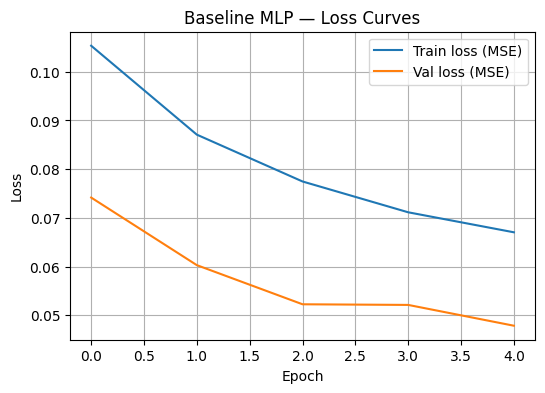

In [24]:
# ============================================================
# Loss curves
# ============================================================

plt.figure(figsize=(6,4))
plt.plot(train_losses_base, label="Train loss (MSE)")
plt.plot(val_losses_base, label="Val loss (MSE)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Baseline MLP — Loss Curves")
plt.grid(True)
plt.legend()
plt.show()

# M3 — Optimization & Regularization

On entraîne un MLP baseline
- Implémentons une boucle d'entraînement complète (train + validation)
- Ajoutons **au moins deux régularisations** :
  - Dropout (déjà dans le MLP)
  - Weight Decay (AdamW)
- Intégrons un **scheduler** (Cosine Annealing)
- Implémentons **Early Stopping**
- Sauvegardons le meilleur modèle sous `best.pt`

On mesure :

- Loss (MSE sur données standardisées),
- MSE / MAE / R² sur les données **rescalées** dans l’échelle originale,
- Plot Predicted vs Ground Truth.


### Full training Loop

In [ ]:
# ============================================================
# M3 — Full Model with Scheduler + Early Stopping
# ============================================================

model = MLP(
    input_dim=len(feature_cols),
    hidden_dims=model_cfg["hidden_dims"],
    dropout=model_cfg["dropout"],
    activation=model_cfg["activation"],
).to(device)

optimizer = torch.optim.AdamW(
    model.parameters(),
    lr=train_cfg["lr"],
    weight_decay=train_cfg["weight_decay"]
)

scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(
    optimizer,
    T_max=train_cfg["epochs"]
)

loss_fn = nn.MSELoss()
epochs = train_cfg["epochs"]

best_val = float("inf")
patience = early_cfg["patience"]
min_delta = early_cfg["min_delta"]
patience_counter = 0

best_state = None

train_losses = []
val_losses = []

OUTPUT_DIR.mkdir(parents=True, exist_ok=True)

print("=== M3 — Full Training with Regularization ===")

for epoch in range(1, epochs + 1):

    # ----- TRAIN -----
    model.train()
    running_train = 0.0
    for xb, yb in train_dl:
        xb, yb = xb.to(device), yb.to(device)

        preds = model(xb)
        loss = loss_fn(preds, yb)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_train += loss.item() * xb.size(0)

    train_loss = running_train / len(train_ds)
    train_losses.append(train_loss)

    # ----- VALIDATION -----
    model.eval()
    running_val = 0.0
    with torch.no_grad():
        for xb, yb in val_dl:
            xb, yb = xb.to(device), yb.to(device)
            preds = model(xb)
            loss = loss_fn(preds, yb)
            running_val += loss.item() * xb.size(0)

    val_loss = running_val / len(val_ds)
    val_losses.append(val_loss)

    scheduler.step()

    print(f"[M3] Epoch {epoch}/{epochs} → train={train_loss:.4f}, val={val_loss:.4f}")

    # ---- EARLY STOPPING ----
    if val_loss + min_delta < best_val:
        best_val = val_loss
        patience_counter = 0

        best_state = {
            "epoch": epoch,
            "model_state": model.state_dict(),
            "optimizer_state": optimizer.state_dict(),
            "feature_cols": feature_cols,
            "target_col": target_col,
        }

        if x_scaler is not None:
            best_state["x_mean"] = x_scaler.mean_.tolist()
            best_state["x_scale"] = x_scaler.scale_.tolist()

        if y_scaler is not None:
            best_state["y_mean"] = y_scaler.mean_.tolist()
            best_state["y_scale"] = y_scaler.scale_.tolist()

        torch.save(best_state, OUTPUT_DIR / "best.pt")

    else:
        patience_counter += 1
        if patience_counter >= patience:
            print(f"Early stopping triggered at epoch {epoch}!")
            break

print(f"Best Validation Loss : {best_val:.4f}")


### Courbe de Loss

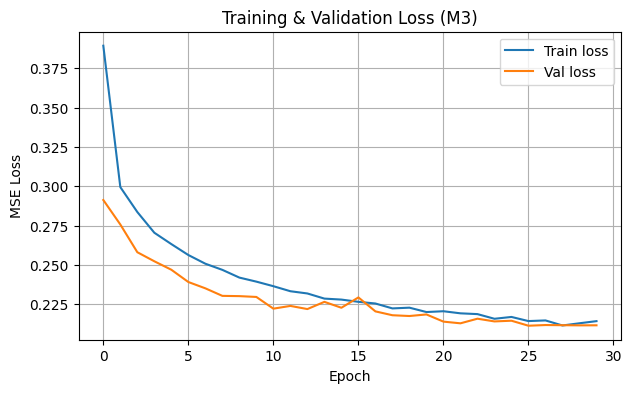

In [ ]:
plt.figure(figsize=(7,4))
plt.plot(train_losses, label="Train loss")
plt.plot(val_losses, label="Val loss")
plt.title("Training & Validation Loss (M3)")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.grid(True)
plt.legend()
plt.show()

explication

### Evaluation final

In [ ]:
# ============================================================
# Final Evaluation (val & test) + Save metrics
# ============================================================

model.load_state_dict(best_state["model_state"])
model.eval()

def evaluate(dataloader, set_name="set"):
    y_pred_std = []
    y_true_std = []
    with torch.no_grad():
        for xb, yb in dataloader:
            xb = xb.to(device)
            pred = model(xb)
            y_pred_std.append(pred.cpu().numpy())
            y_true_std.append(yb.numpy())
    y_pred_std = np.vstack(y_pred_std)
    y_true_std = np.vstack(y_true_std)

    # back to original scale
    y_pred = y_scaler.inverse_transform(y_pred_std)
    y_true = y_scaler.inverse_transform(y_true_std)

    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = math.sqrt(mse)
    r2 = r2_score(y_true, y_pred)

    print(f"\n=== {set_name.upper()} Metrics ===")
    print(f"MSE  = {mse:.2f}")
    print(f"RMSE = {rmse:.2f}")
    print(f"MAE  = {mae:.2f}")
    print(f"R²   = {r2:.4f}")

    return {"mse": mse, "rmse": rmse, "mae": mae, "r2": r2}

val_metrics = evaluate(val_dl, "validation")
test_metrics = evaluate(test_dl, "test")

# Save metrics.json
with open(OUTPUT_DIR / "metrics.json", "w") as f:
    json.dump({"best_val_mse": val_metrics["mse"]}, f, indent=4)

# Save eval.json
with open(OUTPUT_DIR / "eval.json", "w") as f:
    json.dump({"val": val_metrics, "test": test_metrics}, f, indent=4)

print("\nSaved:")
print(" - metrics.json")
print(" - eval.json")



=== VALIDATION Metrics ===
MSE  = 2823644416.00
RMSE = 53137.98
MAE  = 36095.71
R²   = 0.7890

=== TEST Metrics ===
MSE  = 3066180096.00
RMSE = 55373.10
MAE  = 37755.49
R²   = 0.7660

Saved:
 - metrics.json
 - eval.json


### Predicted vs Ground Truth

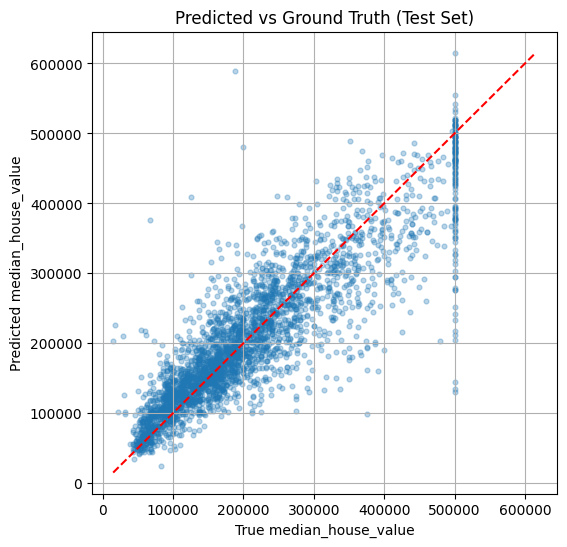

In [ ]:
# ============================================================
# Plot Predicted vs Ground Truth (test set)
# ============================================================

# Récupérer toutes les prédictions du test set
model.eval()

y_true_list = []
y_pred_list = []

with torch.no_grad():
    for xb, yb in test_dl:
        xb = xb.to(device)

        pred_std = model(xb).cpu().numpy()
        true_std = yb.numpy()

        # Remettre à l'échelle originale
        pred = y_scaler.inverse_transform(pred_std)
        true = y_scaler.inverse_transform(true_std)

        y_true_list.append(true)
        y_pred_list.append(pred)

y_true = np.vstack(y_true_list)
y_pred = np.vstack(y_pred_list)

# Plot
plt.figure(figsize=(6,6))
plt.scatter(y_true, y_pred, s=12, alpha=0.3)

# Diagonale
min_v = min(y_true.min(), y_pred.min())
max_v = max(y_true.max(), y_pred.max())
plt.plot([min_v, max_v], [min_v, max_v], "r--")

plt.xlabel("True median_house_value")
plt.ylabel("Predicted median_house_value")
plt.title("Predicted vs Ground Truth (Test Set)")
plt.grid(True)
plt.show()


### Tableau Residuals

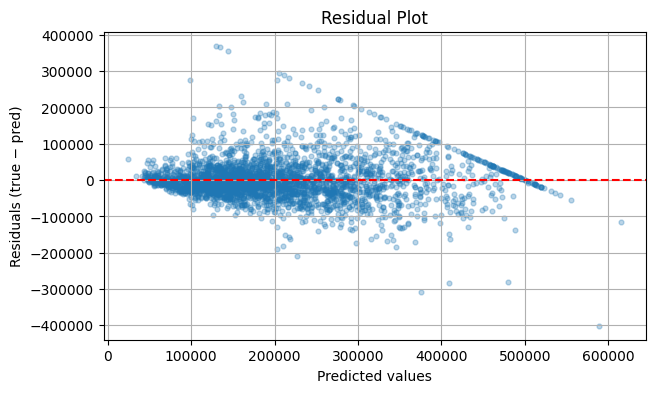

In [ ]:
y_true = np.vstack([y for y in y_true_list])     # already inverse-transformed
y_pred = np.vstack([y for y in y_pred_list])
residuals = y_true - y_pred

plt.figure(figsize=(7,4))
plt.scatter(y_pred, residuals, alpha=0.3, s=12)
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Predicted values")
plt.ylabel("Residuals (true − pred)")
plt.title("Residual Plot")
plt.grid(True)
plt.show()

### Historigramme residuals

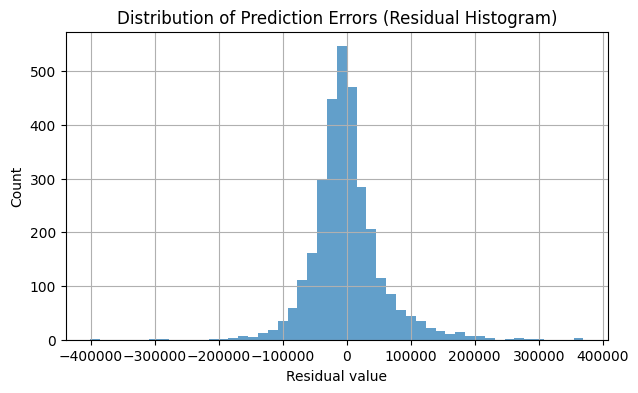

In [ ]:
plt.figure(figsize=(7,4))
plt.hist(residuals, bins=50, alpha=0.7)
plt.xlabel("Residual value")
plt.ylabel("Count")
plt.title("Distribution of Prediction Errors (Residual Histogram)")
plt.grid(True)
plt.show()

### ANALYSE

[A FAIRE]

# M4 — Ablation Studies & Analysis

L’objectif de cette section est de mieux comprendre l’impact de certains
hyperparamètres clés sur les performances du modèle.

Conformément aux exigences du projet, nous réalisons **au moins deux ablations** :

---
1. Ablation 1 — Impact du Learning Rate

Le learning rate influence fortement :
- la vitesse de convergence,
- la stabilité de l’entraînement,
- la qualité du minimum trouvé.

Nous testerons :
- lr = 1e-4
- lr = 1e-3  (valeur YAML)
- lr = 1e-2

---

2. Ablation 2 — Taille du MLP (hidden_dims)

La profondeur et largeur du réseau influencent la capacité du modèle à apprendre
des relations non linéaires.

Nous testerons trois architectures :
- [64, 32]   → plus petit modèle
- [256, 128] → modèle du YAML (baseline)
- [512, 256] → modèle plus large

---

3. Évaluation de chaque expérience
Nous mesurerons :
- MSE
- MAE
- RMSE
- R²

Puis nous enregistrerons les résultats dans un **DataFrame comparatif**.

Enfin, nous analyserons visuellement :
- le graphe Predicted vs Ground Truth,
- les résiduels,
- l’évolution de la dispersion des erreurs.

### Modèle un peu plus rapide

In [ ]:
# ============================================================
#  Utility Training Function for Ablation Experiments
# ============================================================

def train_ablation(
    hidden_dims,
    lr,
    epochs=20,
    dropout=model_cfg["dropout"],
    activation=model_cfg["activation"],
):

    # Build model for experiment
    model_exp = MLP(
        input_dim=input_dim,
        hidden_dims=hidden_dims,
        dropout=dropout,
        activation=activation,
    ).to(device)

    optimizer = torch.optim.AdamW(model_exp.parameters(), lr=lr)
    loss_fn = nn.MSELoss()

    # Training loop (simple, no scheduler, no early stopping)
    for epoch in range(1, epochs + 1):
        model_exp.train()
        running_train = 0
        for xb, yb in train_dl:
            xb, yb = xb.to(device), yb.to(device)
            preds = model_exp(xb)
            loss = loss_fn(preds, yb)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            running_train += loss.item() * xb.size(0)

    # Evaluate on validation set
    model_exp.eval()
    y_pred_std = []
    y_true_std = []

    with torch.no_grad():
        for xb, yb in val_dl:
            xb = xb.to(device)
            pred = model_exp(xb).cpu().numpy()
            y_pred_std.append(pred)
            y_true_std.append(yb.numpy())

    y_pred_std = np.vstack(y_pred_std)
    y_true_std = np.vstack(y_true_std)

    y_pred = y_scaler.inverse_transform(y_pred_std)
    y_true = y_scaler.inverse_transform(y_true_std)

    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)

    return {
        "hidden_dims": str(hidden_dims),
        "lr": lr,
        "MSE": mse,
        "RMSE": rmse,
        "MAE": mae,
        "R2": r2,
    }


### 1. Ablation 1 :  Learning Rate

In [ ]:
# ============================================================
#  Ablation 1: Learning Rate
# ============================================================

lr_values = [1e-4, 1e-3, 1e-2]

results_lr = []

for lr in lr_values:
    print(f"\nRunning LR ablation: lr={lr}")
    res = train_ablation(
        hidden_dims=model_cfg["hidden_dims"],  # same architecture
        lr=lr,
        epochs=10
    )
    results_lr.append(res)

df_lr = pd.DataFrame(results_lr)
df_lr



Running LR ablation: lr=0.0001

Running LR ablation: lr=0.001

Running LR ablation: lr=0.01


,hidden_dims,lr,MSE,RMSE,MAE,R2
0,"[256, 128]",0.0001,3.624727e+09,60205.703916,42707.589844,0.729138
1,"[256, 128]",0.0010,3.088726e+09,55576.303440,38566.246094,0.769191
2,"[256, 128]",0.0100,3.021787e+09,54970.779729,38047.347656,0.774193


### 2. Ablation 2 : Taille du MLP

In [ ]:
# ============================================================
#  Ablation 2: Model Size
# ============================================================

model_sizes = [
    [64, 32],
    model_cfg["hidden_dims"],  # baseline
    [512, 256],
]

results_model = []

for h in model_sizes:
    print(f"\nRunning size ablation: hidden_dims={h}")
    res = train_ablation(
        hidden_dims=h,
        lr=train_cfg["lr"],   # keep baseline lr
        epochs=10
    )
    results_model.append(res)

df_model = pd.DataFrame(results_model)
df_model



Running size ablation: hidden_dims=[64, 32]

Running size ablation: hidden_dims=[256, 128]

Running size ablation: hidden_dims=[512, 256]


,hidden_dims,lr,MSE,RMSE,MAE,R2
0,"[64, 32]",0.001,3.323832e+09,57652.684794,41633.839844,0.751623
1,"[256, 128]",0.001,3.015153e+09,54910.412564,38055.878906,0.774689
2,"[512, 256]",0.001,2.917325e+09,54012.270013,36430.093750,0.781999


### Tableau Comparatif

In [ ]:
# ============================================================
#  Combined Comparison Table
# ============================================================

df_ablation = pd.concat([df_lr, df_model], ignore_index=True)
df_ablation


,hidden_dims,lr,MSE,RMSE,MAE,R2
0,"[256, 128]",0.0001,3.624727e+09,60205.703916,42707.589844,0.729138
1,"[256, 128]",0.0010,3.088726e+09,55576.303440,38566.246094,0.769191
2,"[256, 128]",0.0100,3.021787e+09,54970.779729,38047.347656,0.774193
3,"[64, 32]",0.0010,3.323832e+09,57652.684794,41633.839844,0.751623
4,"[256, 128]",0.0010,3.015153e+09,54910.412564,38055.878906,0.774689
5,"[512, 256]",0.0010,2.917325e+09,54012.270013,36430.093750,0.781999


### ANALYSE

[A FAIRE]

# M5 — Reporting & Final Delivery

---